In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import jupyros as jr
import rospy
from nav_msgs.msg import Odometry
from actionlib_msgs.msg import GoalStatusArray
import ipywidgets as widgets


Text(0, 0.5, 'y')

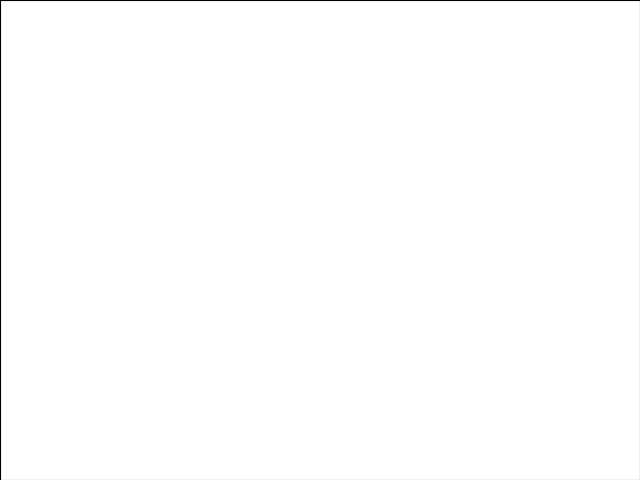

In [2]:
global px, py
px=0
py=0
x_data=[]
y_data=[]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
line, = ax.plot([], [], 'ro')
ax.set_xlim(( -20, 20))
ax.set_ylim((-20, 20))
ax.set_title("my_robot")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [3]:
from __future__ import print_function
import rospy
from geometry_msgs.msg import Point, Pose, Twist
from geometry_msgs.msg import PoseStamped
from sensor_msgs.msg import LaserScan
from nav_msgs.msg import Odometry
import math
import actionlib
import actionlib.msg
import assignment_2_2022.msg
from tf import transformations
from std_srvs.srv import *
import time
from assignment_2_2022.msg import nodeA

import actionlib
import actionlib_msgs
import assignment_2_2022.msg
global xpos, ypos, tarjet_reached, tarjet_cancelled
xpos=0
ypos=0
tarjet_reached=0
tarjet_cancelled=0

In [4]:
def user_select():
 
    op=input("choose action: ")#enter the desired option
    if(op=="1"): #if set new target, go to new_position()
        new_position()
    elif(op=="2"):
        cancel_sim()#if cancel the target, go to cancel_sim()
    #Main program

In [5]:
def odom_callback(msg):
    global x_data, y_data, px, py
    px=msg.pose.pose.position.x
    py=msg.pose.pose.position.y
    y_data.append(msg.pose.pose.position.y)
    x_data.append(msg.pose.pose.position.x)

In [6]:
#rospy.init_node('odom_visualizer_node')
jr.subscribe('/odom', Odometry, odom_callback)

In [7]:
from IPython.display import display

button = widgets.Button(description="Current position")
output = widgets.Output()

button1 = widgets.Button(description="Set position")
output1 = widgets.Output()

button2 = widgets.Button(description="Cancel position")
output2 = widgets.Output()

button3 = widgets.Button(description="Send position")
output3 = widgets.Output()

button4 = widgets.Button(description="Goals status")
output4 = widgets.Output()


In [8]:
def on_button_clicked(b):
    global px, py
    print('pos x: ',px)
    print('pos y: ',py)
    #np_x_plot = np.array(x_data)
    #np_y_plot = np.array(y_data)
    #fig = plt.cla()
    #ax.set_xlim(( -20, 20))
    #ax.set_ylim((-20, 20))
    #ax.plot(np_x_plot,np_y_plot)

In [9]:
def cancel_sim(b):
    #global client
    #client = actionlib.SimpleActionClient('/reaching_goal',assignment_2_2022.msg.PlanningAction)
    client.cancel_goal()#send a signal to cancel the action of reaching the new target
    print("goal cancelled: going back to user select...")
    #user_select() #send the new goal to the client server


In [10]:
def status_callback(msg1):
    #global tarjet_reached, tarjet_cancelled
    #status=msg1.status
    #if status==3:
    #    tarjet_reached=tarject_reached+1
    #if status==2:
    #    tarjet_cancelled=tarjet_cancelled+1
    print(msg1.status_list.status)

In [11]:
def status_button(b):
    global tarjet_reached, tarjet_cancelled
    print('goals reached: ',tarjet_reached)
    print('goals cancelled: ',tarjet_cancelled)

In [12]:
#rospy.init_node('odom_visualizer_node')
#jr.subscribe('/reaching_goal/status', GoalStatusArray, status_callback)

In [13]:
global xpos, ypos
x_new = widgets.IntSlider(min=-10,max=10,step=1,description='Set posx:')
y_new = widgets.IntSlider(min=-10,max=10,step=1,description='Set posy:')
display(x_new,y_new)
x_pos=x_new.value
y_pos=y_new.value

IntSlider(value=0, description='Set posx:', max=10, min=-10)

IntSlider(value=0, description='Set posy:', max=10, min=-10)

In [14]:
def send_position(b):
    #global client
    global xpos, ypos
    print('new position send: ',x_new.value,y_new.value)
    goal=PoseStamped()
    goal.pose.position.x=x_new.value
    goal.pose.position.y=y_new.value
    goal = assignment_2_2022.msg.PlanningGoal(goal)
 #send the new goal to the client server
    client.send_goal(goal)
    

In [15]:
button.on_click(on_button_clicked)
button2.on_click(cancel_sim)
button3.on_click(send_position)
#button4.on_click(status_button)

display(button, output)
display(button2, output2)
display(button3,output3)
#display(button4,output4)

Button(description='Current position', style=ButtonStyle())

Output()

Button(description='Cancel position', style=ButtonStyle())

Output()

Button(description='Send position', style=ButtonStyle())

Output()

pos x:  0.5425769067799454
pos y:  1.627473895100116
new position send:  1 3
goal cancelled: going back to user select...


In [16]:
#rospy.init_node('odom_visualizer_node')
#jr.subscribe('/odom', Odometry, odom_callback)

In [17]:
#print(xpos,ypos)
rospy.init_node('nodeAclient')  # Initializes a rospy node
client = actionlib.SimpleActionClient('/reaching_goal',assignment_2_2022.msg.PlanningAction)#create a client object for an Action client related to the message files Planning.action

#user_select()#enter to the main user interface